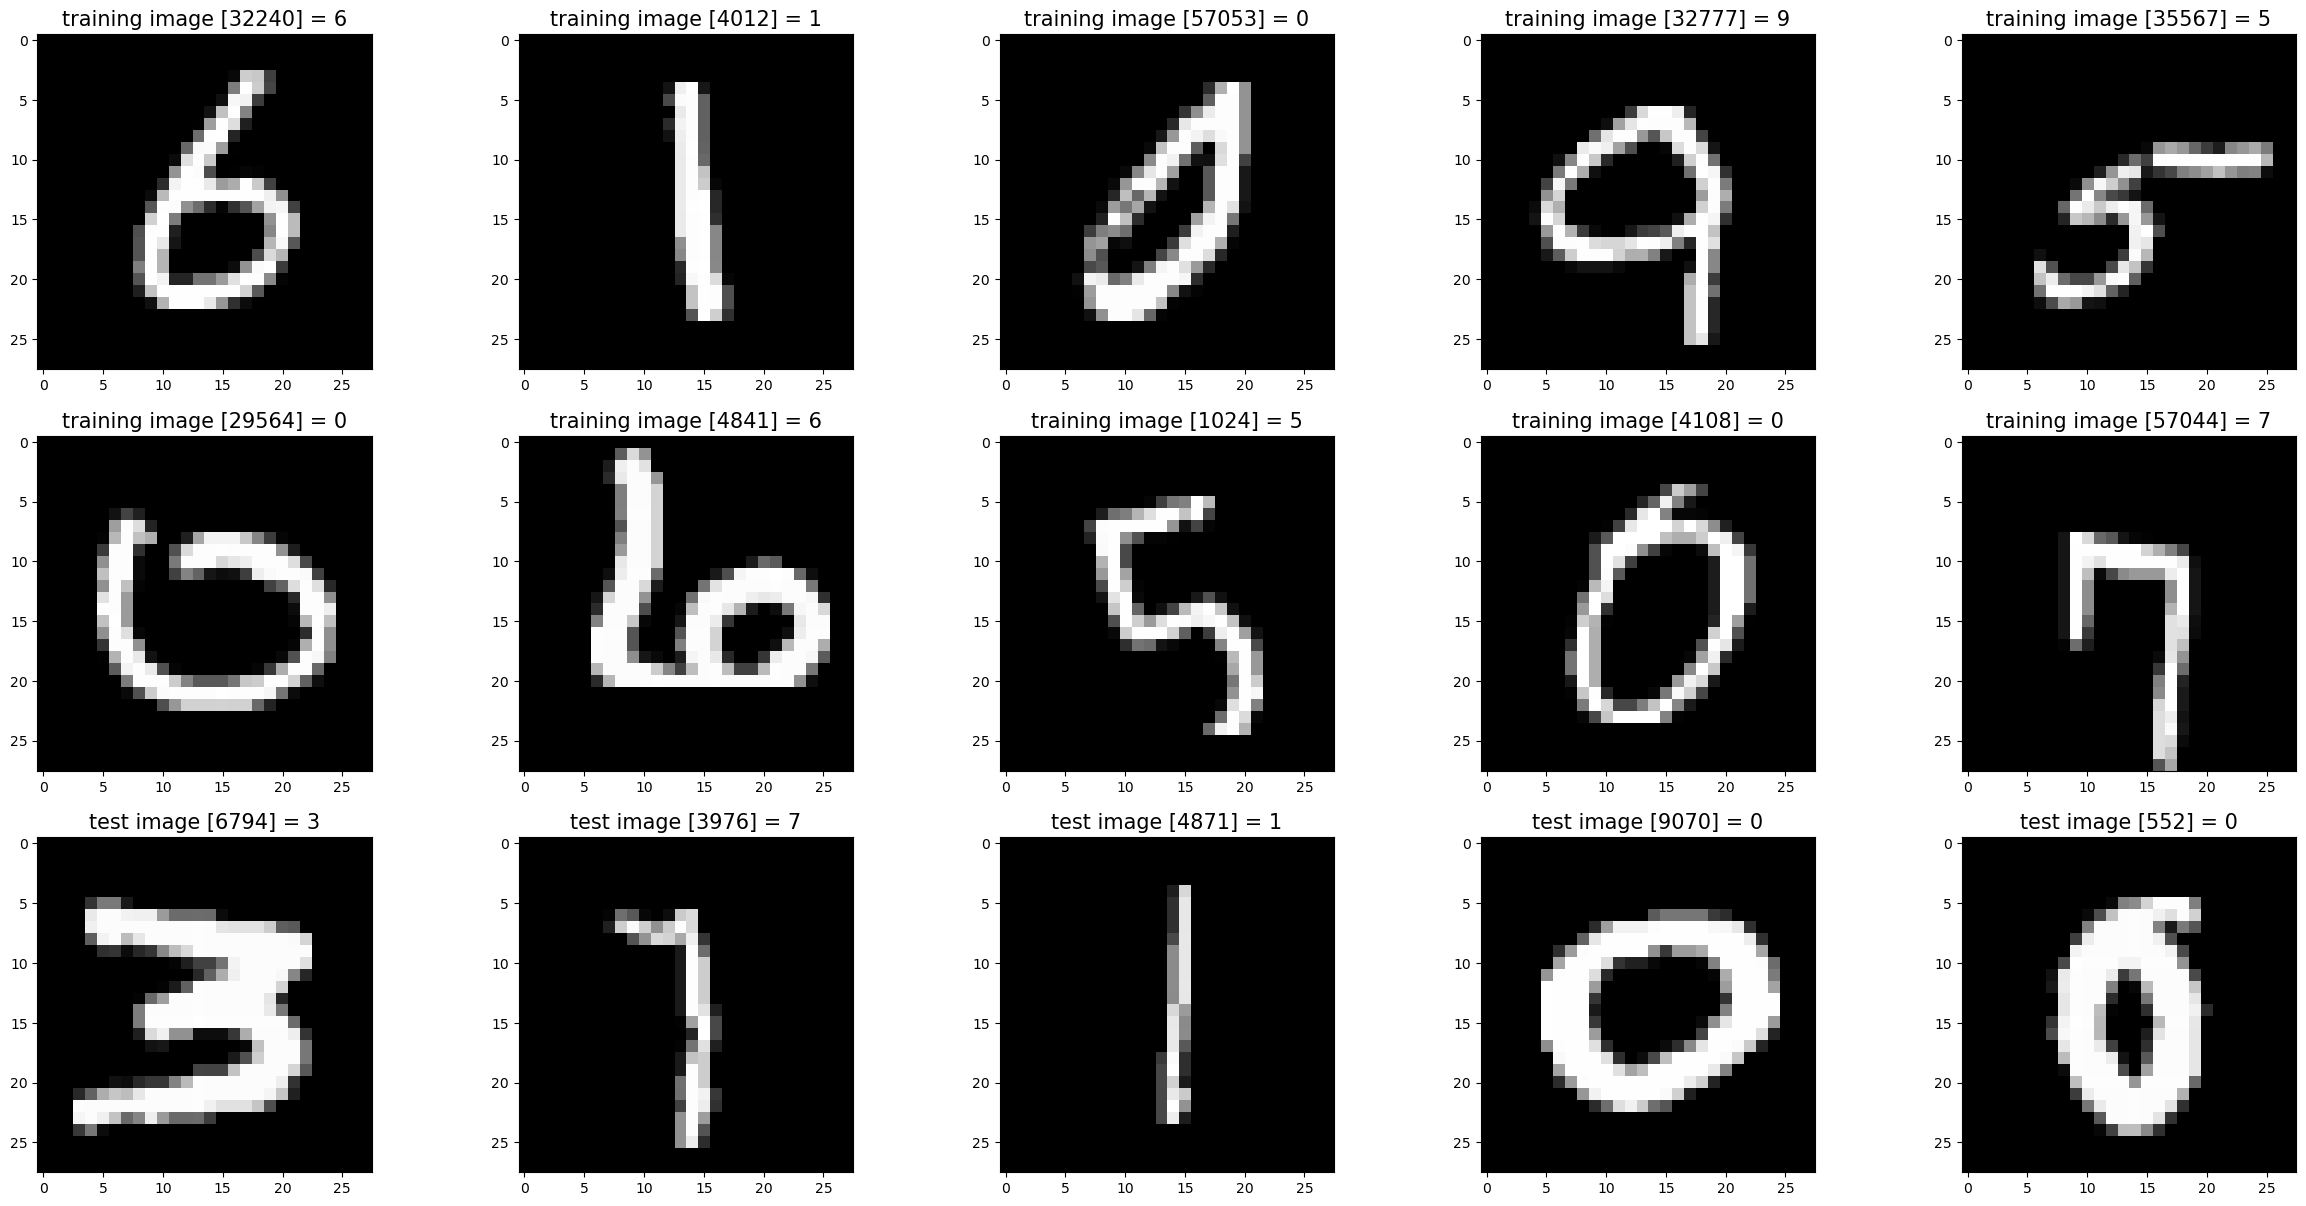

In [1]:
#
# This code comes from: https://www.kaggle.com/code/hojjatk/read-mnist-dataset
#
import matplotlib
matplotlib.use('TkAgg')
import numpy as np  # linear algebra
import struct
from array import array
from os.path import join
import random
import matplotlib.pyplot as plt


#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (np.array(x_train), np.array(y_train)),(np.array(x_test), np.array(y_test))

#
# Set file paths based on added MNIST Datasets
#
input_path = '/Users/jmoore/Documents/ML/archive'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')
#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize=15)
        index += 1
    %matplotlib inline
    plt.show()

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train_init, y_train_init), (x_test_init, y_test_init) = mnist_dataloader.load_data()


np.save(join(input_path, 'mnist-train-x.npy'), x_train_init.reshape(len(x_train_init), 784))
np.save(join(input_path, 'mnist-train-y.npy'), y_train_init)
np.save(join(input_path, 'mnist-test-x.npy'), x_test_init.reshape(len(x_test_init), 784))
np.save(join(input_path, 'mnist-test-y.npy'), y_test_init)

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train_init[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train_init[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test_init[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test_init[r]))

show_images(images_2_show, titles_2_show)

Epoch 1  :::  Train Loss=0.49165013974411303  :::  Val Loss=0.2892340402999473
Epoch 2  :::  Train Loss=0.26065492247370625  :::  Val Loss=0.23288317677341097
Epoch 3  :::  Train Loss=0.208972547080374  :::  Val Loss=0.19552937529551953
Epoch 4  :::  Train Loss=0.17549673040047506  :::  Val Loss=0.17204793612305586
Epoch 5  :::  Train Loss=0.15208934539438193  :::  Val Loss=0.152891135014341
Epoch 6  :::  Train Loss=0.13414362875068317  :::  Val Loss=0.14313733014375313
Epoch 7  :::  Train Loss=0.12031475343479194  :::  Val Loss=0.13101383045112727
Epoch 8  :::  Train Loss=0.10864708418535968  :::  Val Loss=0.12189862046007051
Epoch 9  :::  Train Loss=0.09960741848266161  :::  Val Loss=0.11728595426893816
Epoch 10  :::  Train Loss=0.09078540480666047  :::  Val Loss=0.11356230859269452
Epoch 11  :::  Train Loss=0.08401963527115487  :::  Val Loss=0.10916900008731148
Epoch 12  :::  Train Loss=0.07804849463017643  :::  Val Loss=0.1035922258256257
Epoch 13  :::  Train Loss=0.072644209047246

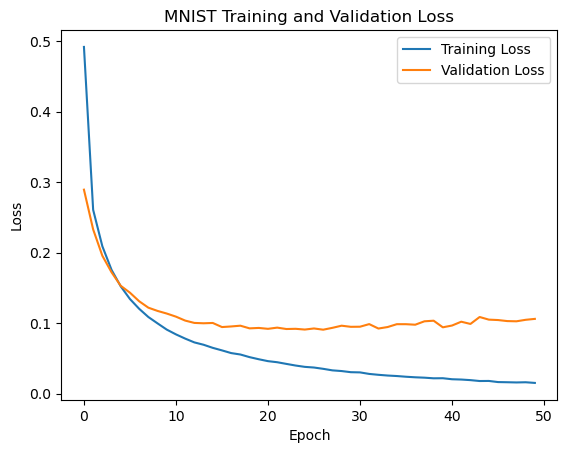

In [4]:
from sklearn.model_selection import train_test_split
from MLP import MultilayerPerceptron, Layer, Mish, Softplus, CrossEntropy, Relu, Softmax, SquaredError

def one_hot_encode(y: np.ndarray, num_classes: int) -> np.ndarray:
    encoded = np.zeros((y.shape[0], num_classes))
    for i, label in enumerate(y):
        encoded[i, int(label)] = 1
    return encoded

# Flatten images and scale pixel values to [0,1]
x_train_flat = x_train_init.reshape(x_train_init.shape[0], -1) / 255.0
x_test_flat = x_test_init.reshape(x_test_init.shape[0], -1) / 255.0

# Convert labels to one-hot encoding (10 classes)
y_train_onehot = one_hot_encode(y_train_init, 10)
y_test_onehot = one_hot_encode(y_test_init, 10)

 # Split the original training set into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train_flat, y_train_onehot, test_size=0.2, random_state=42, shuffle=True)

mlp = MultilayerPerceptron([
    Layer(fan_in=784, fan_out=512, activation_function=Mish(), dropout_rate=0.1),
    Layer(fan_in=512, fan_out=128, activation_function=Mish(), dropout_rate=0),
    Layer(fan_in=128, fan_out=10, activation_function=Softmax())
])


# Train the MLP

training_losses, validation_losses = mlp.train(
    train_x=x_train,
    train_y=y_train,
    val_x=x_val,
    val_y=y_val,
    loss_func=CrossEntropy(),
    learning_rate=1e-4,
    batch_size=50,
    epochs=50,
    use_rmsprop=True,
    decay_rate=0.9,
    epsilon=1e-8
)


# Evaluate the Model on the Test Set and Report Accuracy

y_test_pred = np.argmax(mlp.forward(x_test_flat, training=False), axis=1)
# y_test contains the true labels (as integers)
test_accuracy = np.mean(y_test_pred == np.array(y_test_init))
print(f"Test Accuracy: {test_accuracy * 100}%")

%matplotlib inline
plt.plot(training_losses, label="Training Loss")
plt.plot(validation_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MNIST Training and Validation Loss")
plt.legend()
plt.show()

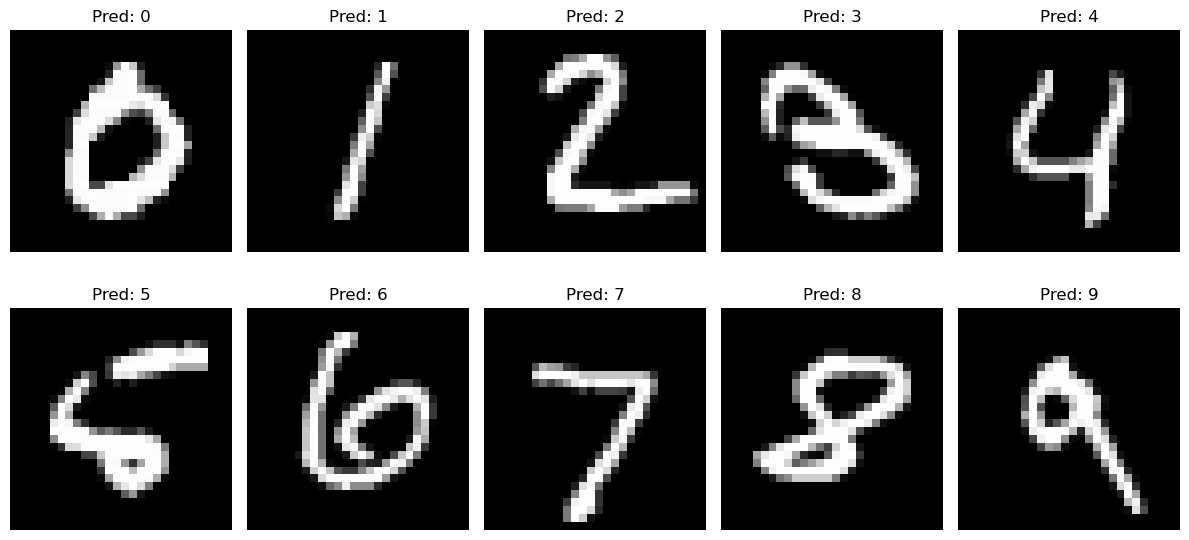

In [3]:
# Assume:
# - x_test_flat is your test data of shape (n_samples, 784) normalized to [0,1]
# - y_test_init contains the true labels as integers
# - mlp is your trained MultilayerPerceptron

# Select one sample per class based on the true labels
selected_indices = {}
for idx, true_label in enumerate(y_test_init):
    if true_label not in selected_indices:
        selected_indices[true_label] = idx
    if len(selected_indices) == 10:
        break

# Convert the selected indices to a sorted list (by digit)
selected_indices = [selected_indices[digit] for digit in sorted(selected_indices.keys())]

# Get the corresponding test images and reshape them to 28x28 for display
selected_images = x_test_flat[selected_indices].reshape(-1, 28, 28)

# Get the predictions for the selected samples
selected_preds = np.argmax(mlp.forward(x_test_flat[selected_indices], training=False), axis=1)

# Plot the images with predicted labels
cols = 5
rows = 2
%matplotlib inline
plt.figure(figsize=(12, 6))
for i, idx in enumerate(selected_indices):
    plt.subplot(rows, cols, i+1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.title(f"Pred: {selected_preds[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
